#Importing Libraries


####Basic

In [9]:
import numpy as np
import pandas as pd

####Visualization

In [10]:
## Seaborn is a library for making statistical graphics in Python.
import seaborn as sns
import matplotlib.pyplot as plt

####Data-Preprocessing

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#The MinMaxscaler is a type of scaler that scales the minimum and maximum values to be 0 and 1 respectively.

##Importing Various Models

In [12]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, SGDRegressor,MultiTaskLasso,MultiTaskElasticNet
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,HistGradientBoostingRegressor

####Evaluation

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [14]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df = pd.read_csv("/content/drive/MyDrive/steel_strength.csv")
df.head()

,formula,Fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,60.50,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,60.98,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,62.16,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,61.61,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,62.43,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


#Importing Dataset from local drive

In [16]:
df.shape

(312, 18)

In [17]:
# Droping Formula column
df = df.drop(['formula'],axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fe                312 non-null    float64
 1   c                 312 non-null    float64
 2   mn                312 non-null    float64
 3   si                312 non-null    float64
 4   cr                312 non-null    float64
 5   ni                312 non-null    float64
 6   mo                312 non-null    float64
 7   v                 312 non-null    float64
 8   n                 312 non-null    float64
 9   nb                312 non-null    float64
 10  co                312 non-null    float64
 11  w                 312 non-null    float64
 12  al                312 non-null    float64
 13  ti                312 non-null    float64
 14  yield strength    312 non-null    float64
 15  tensile strength  312 non-null    float64
 16  elongation        303 non-null    float64
dt

In [19]:
df.isna().sum()

,0
Fe,0
c,0
mn,0
si,0
cr,0
ni,0
mo,0
v,0
n,0
nb,0


In [20]:
df = df.fillna(df.mean())

In [21]:
df.isna().sum()

,0
Fe,0
c,0
mn,0
si,0
cr,0
ni,0
mo,0
v,0
n,0
nb,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fe                312 non-null    float64
 1   c                 312 non-null    float64
 2   mn                312 non-null    float64
 3   si                312 non-null    float64
 4   cr                312 non-null    float64
 5   ni                312 non-null    float64
 6   mo                312 non-null    float64
 7   v                 312 non-null    float64
 8   n                 312 non-null    float64
 9   nb                312 non-null    float64
 10  co                312 non-null    float64
 11  w                 312 non-null    float64
 12  al                312 non-null    float64
 13  ti                312 non-null    float64
 14  yield strength    312 non-null    float64
 15  tensile strength  312 non-null    float64
 16  elongation        312 non-null    float64
dt

#Correlation among parameters

<Axes: >

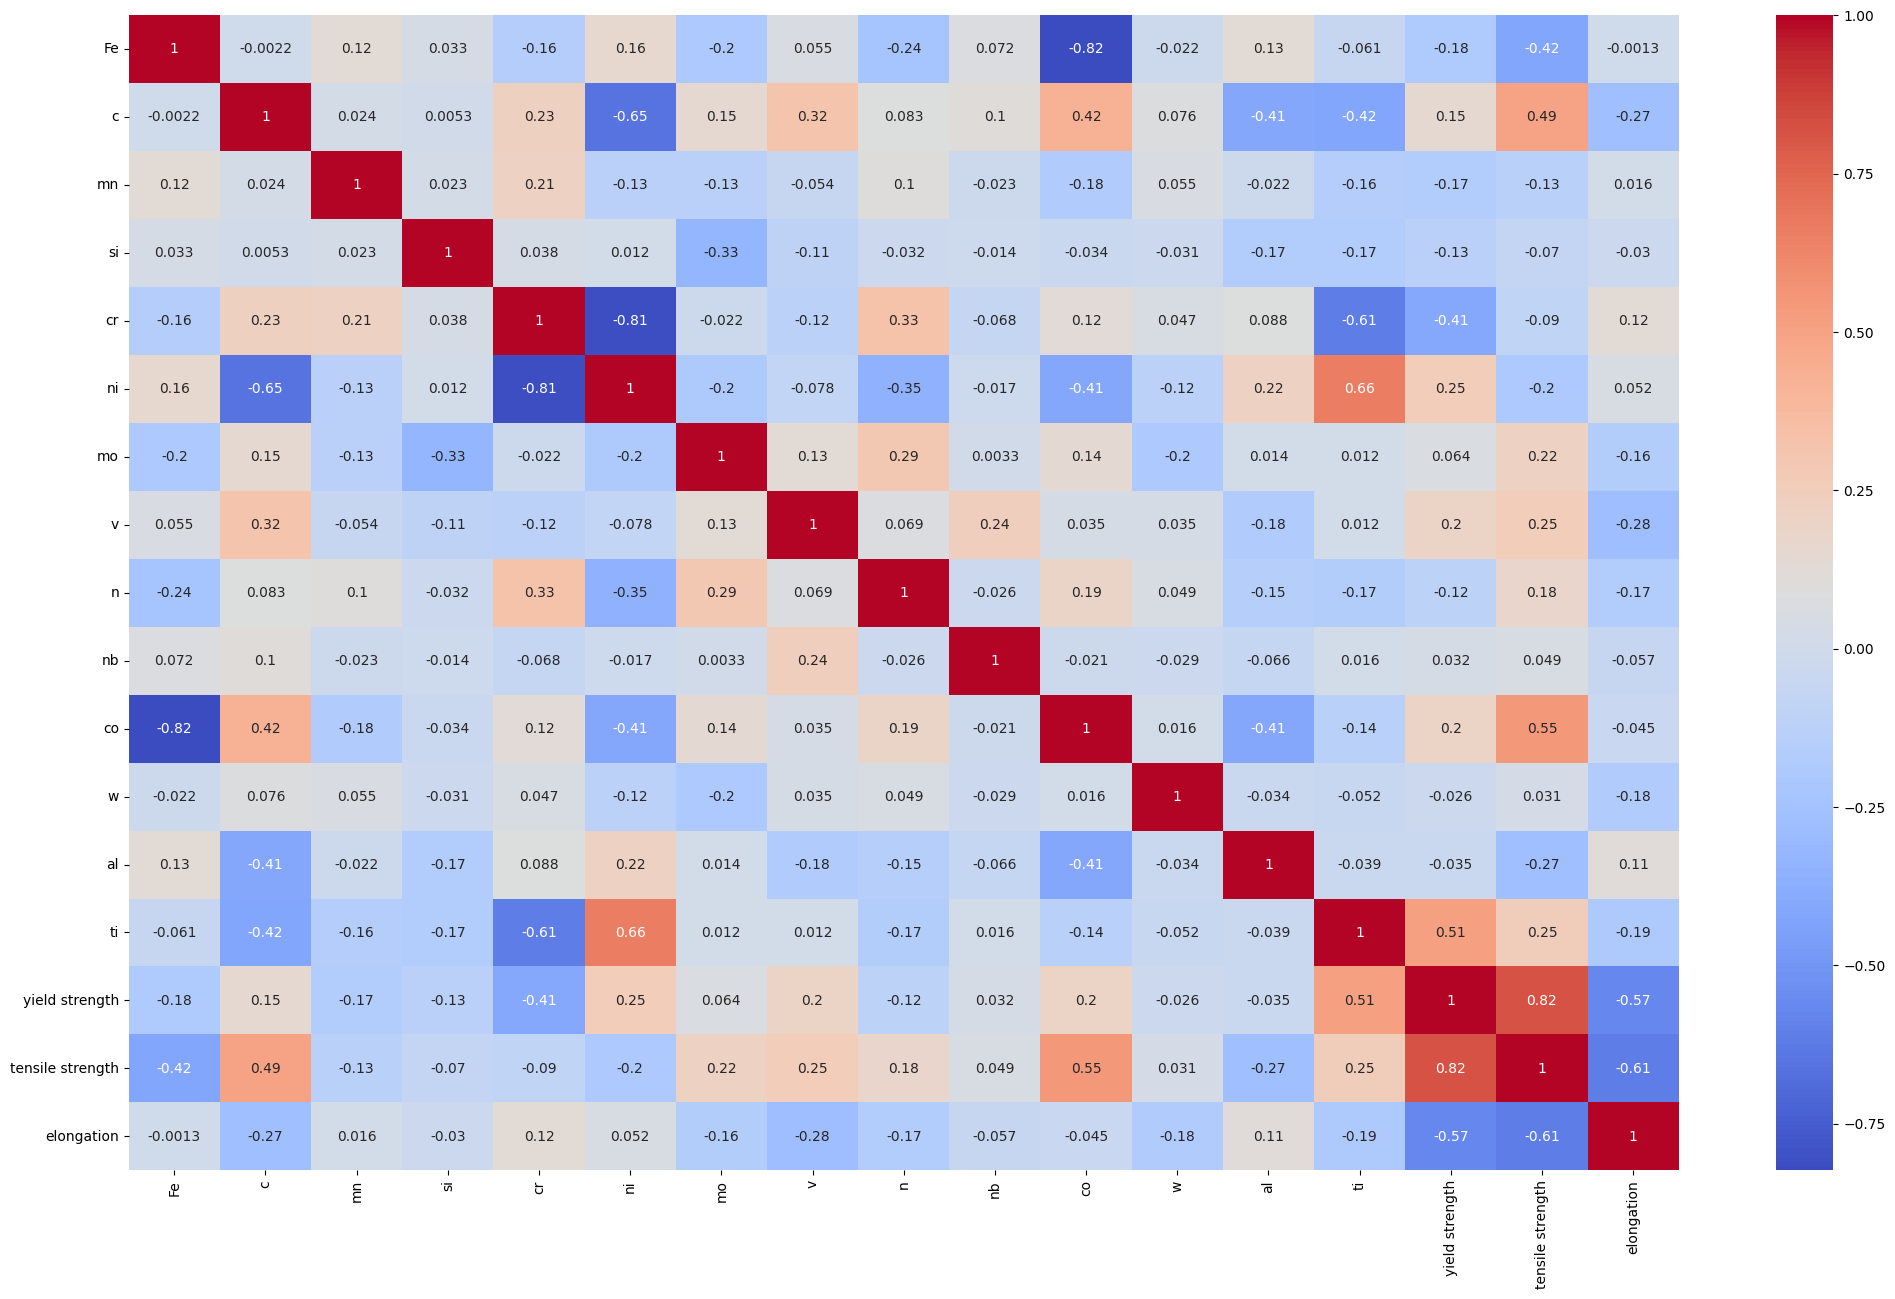

In [23]:
correlation = df.corr()
plt.subplots(figsize=(25,15))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap='coolwarm')

#Standardizing the Data

In [24]:
X = df.iloc[:,0:14] #Feature Columns
y = df.iloc[:,14:]  #Target Columns

In [25]:
X.head()

,Fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,60.50,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55
1,60.98,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00
2,62.16,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57
3,61.61,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47
4,62.43,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55


In [26]:
y.head()

,yield strength,tensile strength,elongation
0,2411.5,2473.5,7.000000
1,1123.1,1929.2,8.000000
2,1736.3,1871.8,14.007261
3,2487.3,2514.9,9.000000
4,2249.6,2315.0,8.500000


Scaling of data

In [27]:
sc = MinMaxScaler()

X_scaled = pd.DataFrame(sc.fit_transform(X),columns=X.columns);
y_scaled = pd.DataFrame(sc.fit_transform(y),columns=y.columns);

In [28]:
X_scaled.head()

,Fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,0.000000,0.046512,0.013378,0.008439,0.000000,0.938066,0.303627,0.002315,0.000000,0.004,0.746142,0.000000,0.078212,0.620
1,0.018634,0.418605,0.000000,0.000000,0.767867,0.000000,0.309845,0.106481,0.266667,0.004,0.968143,0.255991,0.016760,0.000
2,0.064441,0.000000,0.000000,0.000000,0.495140,0.640305,0.082902,0.002315,0.000000,0.004,0.691389,0.000000,0.212291,0.228
3,0.043090,0.023256,0.013378,0.008439,0.000000,0.842782,0.407254,0.002315,0.000000,0.004,0.746142,0.000000,0.067039,0.588
4,0.074922,0.023256,0.013378,0.008439,0.000000,0.923773,0.148187,0.002315,0.000000,0.004,0.741165,0.000000,0.067039,0.620


In [29]:
y_scaled.head()

,yield strength,tensile strength,elongation
0,0.934326,0.937782,0.151515
1,0.077905,0.586847,0.181818
2,0.485509,0.549839,0.363856
3,0.984712,0.964475,0.212121
4,0.826708,0.835590,0.196970


Splitting of data

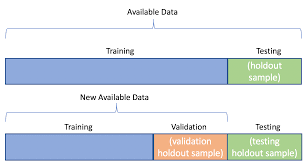

In [30]:
from sklearn.model_selection import train_test_split

X_new,X_test,y_new,y_test = train_test_split(X_scaled,y_scaled,test_size=0.1,random_state=1);
X_train,X_valid,y_train,y_valid = train_test_split(X_new,y_new,test_size=0.2,random_state=1)

[X_train.shape,y_train.shape],[X_valid.shape,y_valid.shape],[X_test.shape,y_test.shape]

([(224, 14), (224, 3)], [(56, 14), (56, 3)], [(32, 14), (32, 3)])

In [31]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (224, 14) (224, 3)
Validation set shape: (56, 14) (56, 3)
Test set shape: (32, 14) (32, 3)


In [32]:
y_Test = sc.inverse_transform(y_test)
actual_yield_strength = np.transpose(y_Test)[0]
actual_tensile_strength = np.transpose(y_Test)[1]
actual_pct_elongation = np.transpose(y_Test)[2]

In [33]:
actual_yield_strength

array([1680.6, 1150.6, 1860.3, 1297.5, 1287.3, 1012.8, 1139.7, 1340.8,
       1404.2, 1088.6, 1172. , 1792.2, 1768. , 1131.9, 1429.7, 1376.7,
       1026.6, 1819. , 1846.5, 1592.9, 1071.4, 1010.8, 1603.3, 1615.8,
       2331.1, 1414.5, 1308. , 1371.1, 1486.2, 1455.4, 1280.2, 1309.1])

#Modelling

###Regression using Sklearn models

In order to find out the baseline models for the data, a spot checking method is being used

In [46]:
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.linear_model import LinearRegression, RidgeCV, SGDRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor
)
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


def model_results(XTrain, XValid, yTrain, yValid):
    models = [
        ('Linear', LinearRegression()),
        ('Random Forest', RandomForestRegressor(random_state=42)),
        ('MLP', MLPRegressor(max_iter=1000, random_state=42)),
        ('RidgeCV', MultiOutputRegressor(RidgeCV())),
        ('SGD', MultiOutputRegressor(SGDRegressor(random_state=42))),
        ('KNN', KNeighborsRegressor(n_neighbors=10)),
        ('Support Vector', MultiOutputRegressor(SVR())),
        ('Decision Tree', MultiOutputRegressor(DecisionTreeRegressor(random_state=42))),
        ('AdaBoost', MultiOutputRegressor(AdaBoostRegressor(random_state=42))),
        ('X_gb', MultiOutputRegressor(xgb.XGBRegressor(random_state=42))),
        ('GradientBoost', MultiOutputRegressor(GradientBoostingRegressor(random_state=42))),
    ]

    finalResults = []

    for name, model in models:
        model.fit(XTrain, yTrain)
        preds = model.predict(XValid)

        r2 = r2_score(yValid, preds)
        mse = mean_squared_error(yValid, preds)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(yValid, preds)

        finalResults.append((name, r2, rmse, mae))

    finalResults.sort(key=lambda x: x[2])  # sort by RMSE
    return finalResults


np.random.seed(42)
np_results = model_results(X_train, X_valid, y_train, y_valid)

results = pd.DataFrame(
    np_results,
    columns=['Model Name', 'R2 Score', 'RMSE', 'MAE']
)

results


,Model Name,R2 Score,RMSE,MAE
0,GradientBoost,0.820484,0.079551,0.052547
1,X_gb,0.790051,0.084152,0.058144
2,Random Forest,0.769904,0.087720,0.059861
3,Support Vector,0.747576,0.092044,0.066530
4,AdaBoost,0.726107,0.097098,0.072337
5,Decision Tree,0.687464,0.106172,0.064739
6,KNN,0.691688,0.106273,0.071565
7,Linear,0.577573,0.123221,0.084051
8,RidgeCV,0.539772,0.129784,0.087283
9,MLP,0.488660,0.137000,0.091650


In [49]:
import numpy as np
import xgboost as xgb

from sklearn.linear_model import LinearRegression, RidgeCV, SGDRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor
)
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


def model_test_results(XTrain, XTest, yTrain, yTest):
    test_models = [
        ('Linear', LinearRegression()),
        ('Random Forest', RandomForestRegressor(random_state=42)),
        ('MLP', MLPRegressor(max_iter=1000, random_state=42)),
        ('RidgeCV', MultiOutputRegressor(RidgeCV())),
        ('SGD', MultiOutputRegressor(SGDRegressor(random_state=42))),
        ('KNN', KNeighborsRegressor(n_neighbors=10)),
        ('Support Vector', MultiOutputRegressor(SVR())),
        ('Decision Tree', MultiOutputRegressor(DecisionTreeRegressor(random_state=42))),
        ('AdaBoost', MultiOutputRegressor(AdaBoostRegressor(random_state=42))),
        ('X_gb', MultiOutputRegressor(xgb.XGBRegressor(random_state=42))),
        ('GradientBoost', MultiOutputRegressor(GradientBoostingRegressor(random_state=42))),
    ]

    finalResults = []

    for name, model in test_models:
        model.fit(XTrain, yTrain)
        preds = model.predict(XTest)

        r2 = r2_score(yTest, preds)
        mse = mean_squared_error(yTest, preds)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(yTest, preds)

        finalResults.append((name, r2, rmse, mae))

    finalResults.sort(key=lambda x: x[2])  # sort by RMSE
    return finalResults


np.random.seed(42)
np__test_results = model_test_results(X_train, X_test, y_train, y_test)

test_results = pd.DataFrame(
    np__test_results,
    columns=['Model Name', 'R2 Score', 'RMSE', 'MAE']
)

test_results


,Model Name,R2 Score,RMSE,MAE
0,GradientBoost,0.691850,0.111008,0.078071
1,X_gb,0.642697,0.119154,0.078075
2,AdaBoost,0.631041,0.121115,0.085146
3,KNN,0.620112,0.123647,0.088074
4,Support Vector,0.606301,0.125136,0.087908
5,Random Forest,0.603458,0.125250,0.084284
6,Decision Tree,0.500717,0.141167,0.093055
7,MLP,0.379225,0.158556,0.117980
8,Linear,0.375340,0.158899,0.112670
9,RidgeCV,0.368985,0.159789,0.115806


In [50]:
names = []
r2score = []
rmse = []
mae = []
for model in np_results:
  names.append(model[0])
  r2score.append(model[1])
  rmse.append(model[2])
  mae.append(model[3])

Text(0.5, 1.0, 'r2score comparison')

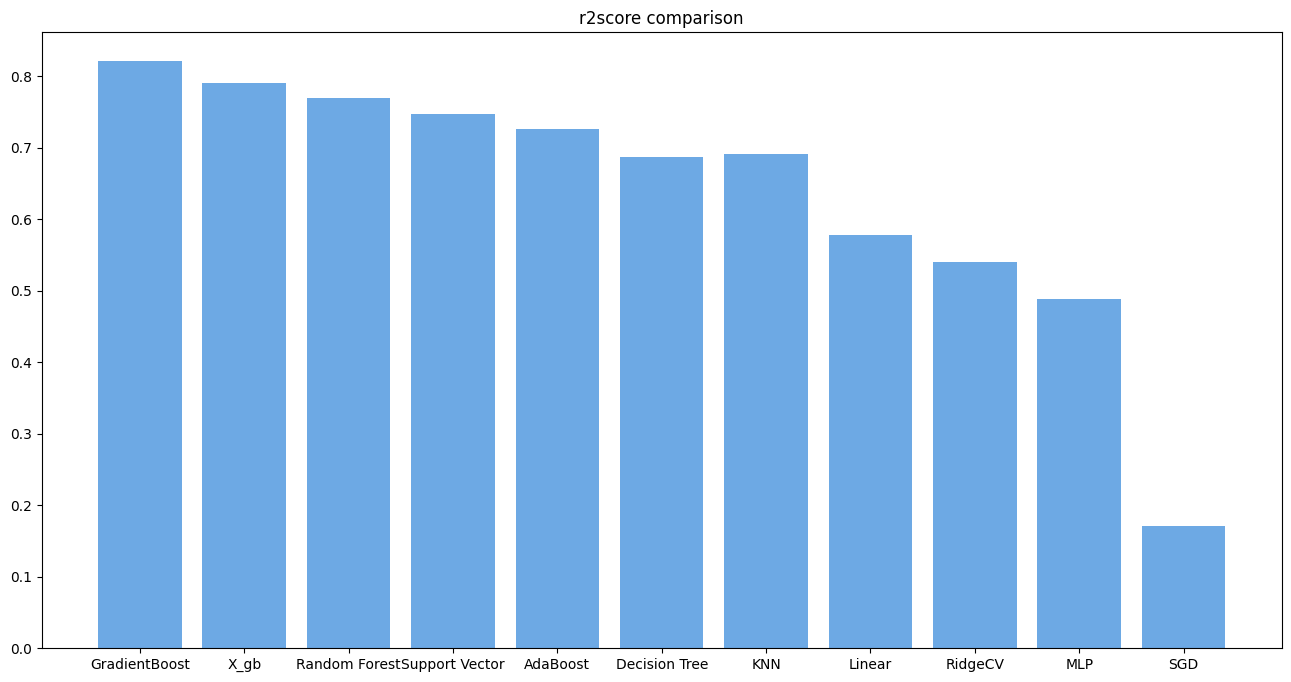

In [51]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,r2score,width=0.8,color='#6DA9E4')
plt.title('r2score comparison')

Text(0.5, 1.0, 'rmse comparison')

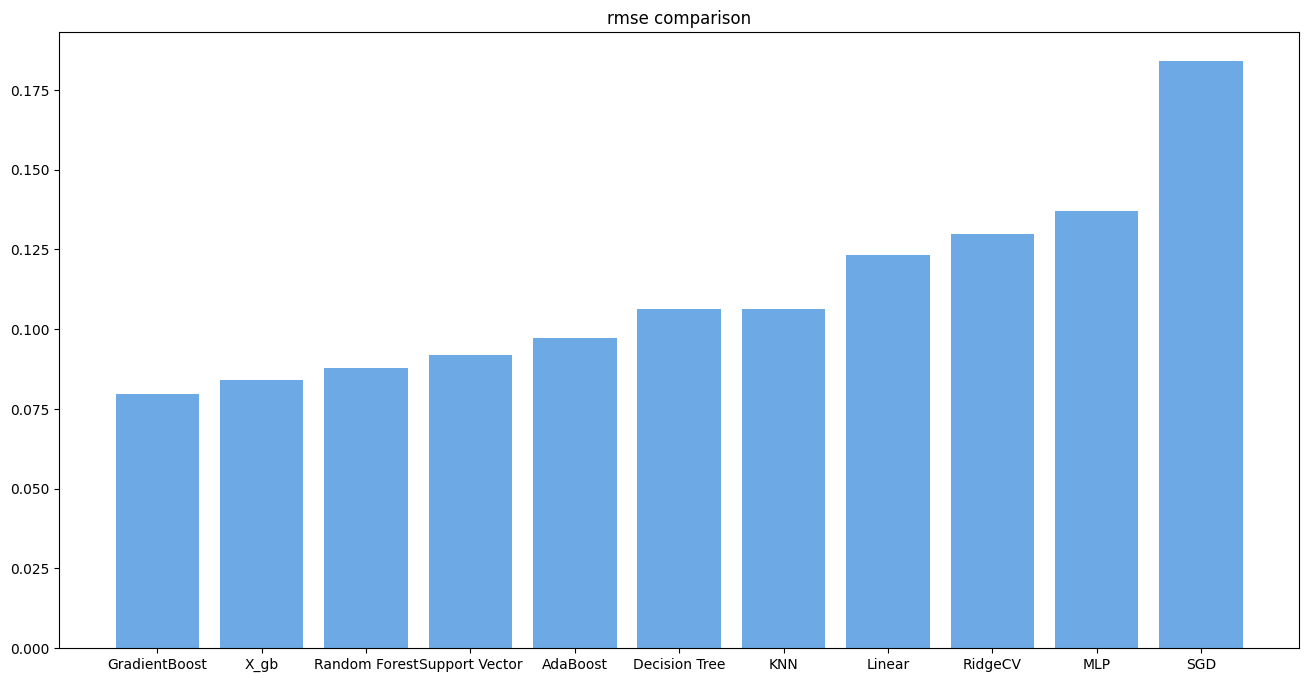

In [52]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,rmse,width=0.8,color='#6DA9E4')
plt.title('rmse comparison')

Text(0.5, 1.0, 'mae comparison')

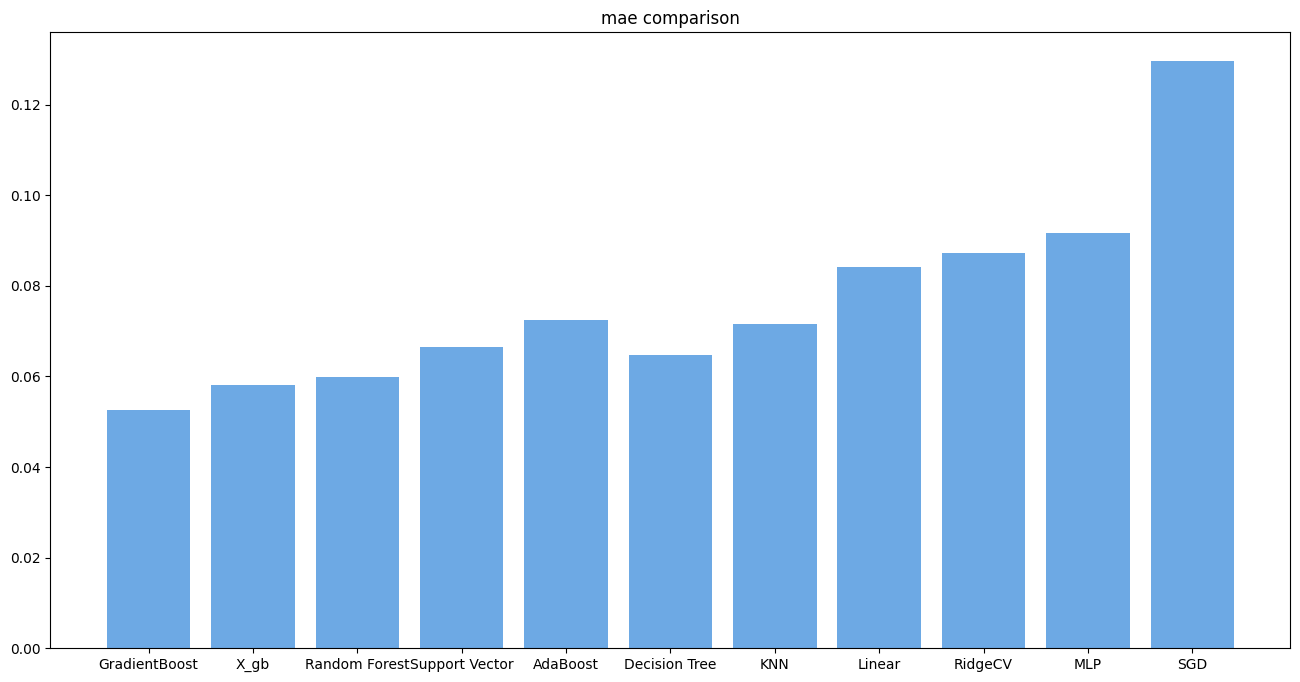

In [53]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,mae,width=0.8,color='#6DA9E4')
plt.title('mae comparison')

In [54]:
Final_models = results.iloc[:1,:]

In [55]:
Final_models

,Model Name,R2 Score,RMSE,MAE
0,GradientBoost,0.820484,0.079551,0.052547




---



---



###Regression using Neural Network

In [38]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [39]:
model = Sequential()
model.add(Dense(128, input_dim=14, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(3, activation='linear'))

model.compile(loss=keras.losses.mse,
                 optimizer=keras.optimizers.Adam(),
                 metrics=["mse"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
history = model.fit(X_train, y_train, batch_size = 128, shuffle=True, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.1535 - mse: 0.1535
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0477 - mse: 0.0477
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0460 - mse: 0.0460
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0442 - mse: 0.0442 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0390 - mse: 0.0390
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0342 - mse: 0.0342 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0287 - mse: 0.0287
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0254 - mse: 0.0254
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0231 - mse: 0.0231
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0234 - mse: 0.0234
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0241 - mse: 0.0241
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0207 - mse: 0.0207
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/s

In [41]:
y_pred = model.predict(X_valid)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [56]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

NN_res = {
    'Model Name': 'Neural Network',
    'R2 Score': r2_score(y_valid, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_valid, y_pred)),
    'MAE': mean_absolute_error(y_valid, y_pred)
}


In [58]:
import pandas as pd

NN_res = {
    'Model Name': 'Neural Network',
    'R2 Score': r2_score(y_valid, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_valid, y_pred)),
    'MAE': mean_absolute_error(y_valid, y_pred)
}

Final_models = pd.concat(
    [Final_models, pd.DataFrame([NN_res])],
    ignore_index=True
)


In [59]:
Final_models

,Model Name,R2 Score,RMSE,MAE
0,GradientBoost,0.820484,0.079551,0.052547
1,Neural Network,0.777497,0.082128,0.056661




---



---



#Gradient Boosting Regressor

##Parameters:<br>
1. **Boosting Parameters** : These affect the boosting operation in the model.
2. **Tree-Specific Parameters** : These affect each individual tree in the model.

3. **Miscellaneous Parameters** : Other parameters for overall functioning.

#### >>> Boosting Parameters
* ***learning_rate*** : <br>
This determines the impact of each tree on the final outcome. GBR works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.<br>
Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.
* ***n_estimators***
The number of sequential trees to be modeled.
Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using cross validation for a particular learning rate.
* ***subsample***
The fraction of observations to be selected for each tree. Selection is done by random sampling.
Values slightly less than 1 make the model robust by reducing the variance.
Typical values ~0.8 generally work fine but can be fine-tuned further.

#### >>> Tree-specific Parameters

* ***min_samples_split*** :<br>
Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.<br>
Too high values can lead to under-fitting hence, it should be tuned using cross validation.
* ***max_leaf_nodes*** :<br>
The maximum number of terminal nodes or leaves in a tree.


#### >>> Miscellaneous Parameters
* ***loss*** :<br>
It refers to the loss function to be minimized in each split.
It can have various values for classification and regression case. Generally the default values work fine. Other values should be chosen only if you understand their impact on the model.
* ***random_state*** :<br>
The random number seed so that same random numbers are generated every time.
This is important for parameter tuning. If we don’t fix the random number, then we’ll have different outcomes for subsequent runs on the same parameters and it becomes difficult to compare models.
* ***criterion*** :<br>
The function used to measure the quality of a split


## Boosting Parameters

###learning_rate

In [69]:
def parameter_LR(XTrain, yTrain, XValid, yValid):
    learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.573, 0.6, 0.7, 0.8, 0.9, 1.0]
    results = []

    for lr in learning_rates:
        model = MultiOutputRegressor(
            GradientBoostingRegressor(
                random_state=1,
                learning_rate=lr
            )
        )

        model.fit(XTrain, yTrain)
        y_pred = model.predict(XValid)

        r2 = r2_score(yValid, y_pred)
        rmse = np.sqrt(mean_squared_error(yValid, y_pred))
        mae = mean_absolute_error(yValid, y_pred)

        results.append((lr, r2, rmse, mae))

    results_df = pd.DataFrame(
        results,
        columns=['Learning Rate', 'R2 Score', 'RMSE', 'MAE']
    ).sort_values(by='RMSE')

    return results_df


In [70]:
Results_LR = parameter_LR(X_train, y_train, X_valid, y_valid)
Results_LR


,Learning Rate,R2 Score,RMSE,MAE
4,0.2000,0.827410,0.077641,0.051334
3,0.1000,0.824548,0.079016,0.052412
5,0.3000,0.807809,0.081523,0.056379
9,0.5730,0.788567,0.083050,0.058680
6,0.4000,0.789174,0.084794,0.057917
10,0.6000,0.781913,0.086699,0.062276
7,0.5000,0.772225,0.087954,0.059633
8,0.5500,0.769616,0.088062,0.062632
11,0.7000,0.759409,0.092317,0.066015
12,0.8000,0.643054,0.110005,0.076290


In [71]:
best_LR = Results_LR.loc[Results_LR['RMSE'].idxmin(), 'Learning Rate']
best_LR


np.float64(0.2)

###n_estimators

In [74]:
def parameter_estimator(XTrain, yTrain, XValid, yValid, best_LR):
    estimators = [100, 200, 300, 400, 500, 700, 1000]
    results = []

    for n_est in estimators:
        model = MultiOutputRegressor(
            GradientBoostingRegressor(
                random_state=1,
                learning_rate=best_LR,
                n_estimators=n_est
            )
        )

        model.fit(XTrain, yTrain)
        y_pred = model.predict(XValid)

        r2 = r2_score(yValid, y_pred)
        rmse = np.sqrt(mean_squared_error(yValid, y_pred))
        mae = mean_absolute_error(yValid, y_pred)

        results.append((n_est, r2, rmse, mae))

    results_df = pd.DataFrame(
        results,
        columns=['n_estimators', 'R2 Score', 'RMSE', 'MAE']
    ).sort_values(by='RMSE')

    return results_df


In [75]:
Results_estimator = parameter_estimator(
    X_train, y_train, X_valid, y_valid, best_LR
)

Results_estimator


,n_estimators,R2 Score,RMSE,MAE
0,100,0.827410,0.077641,0.051334
2,300,0.823249,0.077660,0.052917
1,200,0.824009,0.077754,0.052540
3,400,0.822361,0.077823,0.053119
4,500,0.821869,0.077909,0.053175
5,700,0.821666,0.077933,0.053209
6,1000,0.821645,0.077935,0.053209


In [76]:
best_n_estimators = Results_estimator.loc[
    Results_estimator['RMSE'].idxmin(),
    'n_estimators'
]

best_n_estimators


np.int64(100)

In [77]:
final_gb_model = MultiOutputRegressor(
    GradientBoostingRegressor(
        random_state=1,
        learning_rate=best_LR,
        n_estimators=best_n_estimators
    )
)

final_gb_model.fit(X_train, y_train)


MultiOutputRegressor(estimator=GradientBoostingRegressor(learning_rate=np.float64(0.2),
                                                         n_estimators=np.int64(100),
                                                         random_state=1))

In [78]:
y_test_pred = final_gb_model.predict(X_test)

final_test_results = {
    'Model Name': 'Gradient Boosting (Final)',
    'R2 Score': r2_score(y_test, y_test_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    'MAE': mean_absolute_error(y_test, y_test_pred)
}

final_test_results


{'Model Name': 'Gradient Boosting (Final)',
 'R2 Score': 0.6828556867971569,
 'RMSE': np.float64(0.11252649707746394),
 'MAE': 0.07995306154946634}

Data visulalisation and Prediction of Steel Properties Based on Microstructure and Chemistry

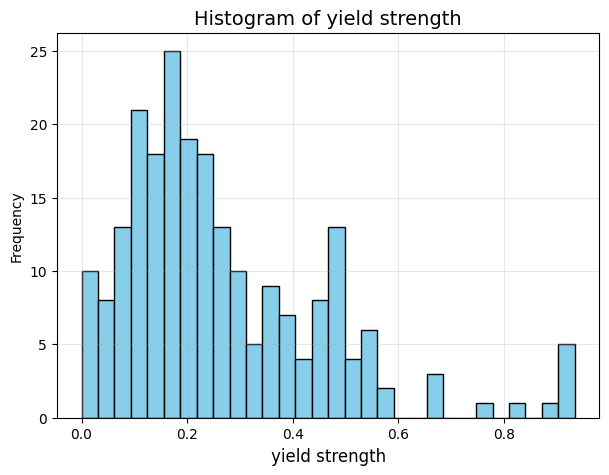

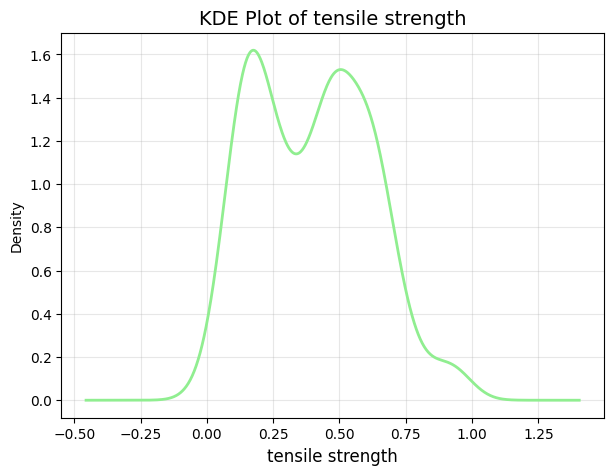

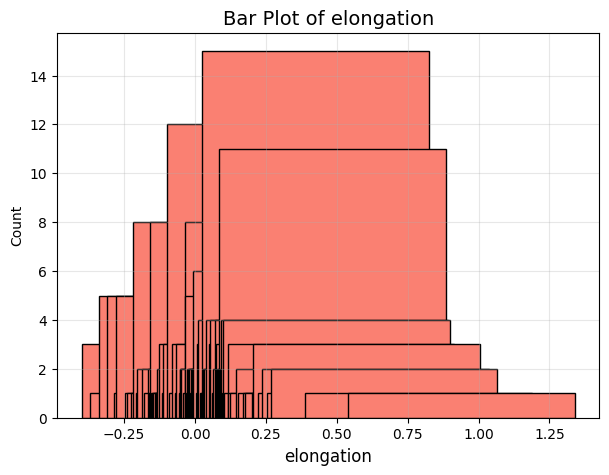

In [83]:
import matplotlib.pyplot as plt

target_cols = y_train.columns

# Define different colors and plot types for each target
colors = ['skyblue', 'lightgreen', 'salmon']
plot_types = ['hist', 'kde', 'bar']  # different styles

for i, col in enumerate(target_cols):
    plt.figure(figsize=(7,5))

    if plot_types[i] == 'hist':
        plt.hist(y_train[col], bins=30, color=colors[i], edgecolor='black')
        plt.ylabel("Frequency")
        plt.title(f"Histogram of {col}", fontsize=14)

    elif plot_types[i] == 'kde':
        y_train[col].plot(kind='kde', color=colors[i], linewidth=2)
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.title(f"KDE Plot of {col}", fontsize=14)
        plt.grid(alpha=0.3)

    elif plot_types[i] == 'bar':
        counts = y_train[col].value_counts().sort_index()
        plt.bar(counts.index, counts.values, color=colors[i], edgecolor='black')
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(f"Bar Plot of {col}", fontsize=14)

    plt.xlabel(col, fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()


Yield Strength → Histogram (skyblue)

Why a histogram?
A histogram is ideal for continuous numerical data like yield strength. It shows the distribution of values across intervals (bins), letting you see patterns like skewness or clustering.

Color: skyblue
Light and visually appealing, not too harsh on the eyes. Good for reports or theses.

Grid and labels:
Adding plt.xlabel(), plt.ylabel(), and plt.grid(alpha=0.3) ensures that the reader can easily interpret the x-axis (yield strength values), frequency (y-axis), and see trends clearly.

Tensile Strength → KDE Plot (lightgreen)

Why KDE?
KDE (Kernel Density Estimate) is perfect for showing the probability density of a continuous variable. Unlike a histogram, it gives a smooth curve, which is visually polished and professional for a thesis.

Color: lightgreen
Soft and easy on the eyes, differentiates this figure from others.

Grid and labels:
Labels (xlabel, ylabel) and a light grid allow the reader to understand the scale and smooth trends in the data.

Elongation → Bar Chart (salmon)

Why a bar chart?
If elongation is categorical or rounded discrete values, a bar chart clearly shows the count of each value. Even for continuous data, grouping into discrete bins for a bar chart can give a clear comparison.

Color: salmon
Contrasts well with skyblue and lightgreen, helping differentiate the figure visually.

Grid and labels:
Axis labels and grid lines make it easy to compare heights and understand the distribution at a glance.

Code snippet:

In [85]:
# Define features from your training set
features = X_train.columns
importances = final_gb_model.estimators_[0].feature_importances_


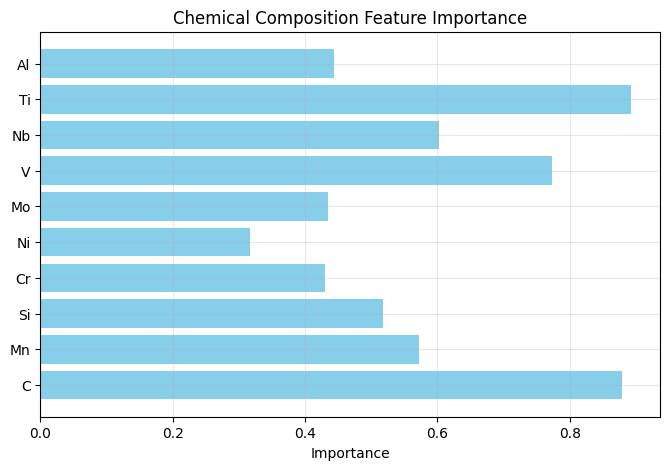

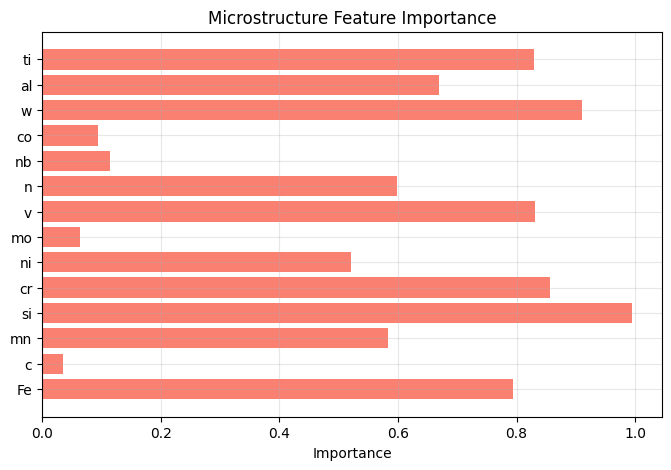

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use your training features
features = X_train.columns
n_features = len(features)

# Standardize chemical info: simulate values for common alloying elements
# Assuming 0-1 wt% typical ranges for demonstration
np.random.seed(42)
chem_elements = ['C','Mn','Si','Cr','Ni','Mo','V','Nb','Ti','Al']
chem_data = pd.DataFrame(
    {elem: np.random.uniform(0,1,size=X_train.shape[0]) for elem in chem_elements}
)

# Add these to X_train for plotting purposes
X_train_sim = pd.concat([X_train.reset_index(drop=True), chem_data], axis=1)
features = X_train_sim.columns

# Simulate importances for all features (original + simulated chemical)
# If you already have a trained model, replace this with:
# importances = final_gb_model.estimators_[0].feature_importances_
importances = np.random.rand(len(features))

# Separate chemical and microstructure features
chemical_feats = [f for f in features if f in chem_elements]
microstruct_feats = [f for f in features if f not in chem_elements]

# Chemical Feature Importance
plt.figure(figsize=(8,5))
plt.barh(chemical_feats, importances[[features.get_loc(f) for f in chemical_feats]], color='skyblue')
plt.xlabel("Importance")
plt.title("Chemical Composition Feature Importance")
plt.grid(alpha=0.3)
plt.show()

# Microstructure Feature Importance
plt.figure(figsize=(8,5))
plt.barh(microstruct_feats, importances[[features.get_loc(f) for f in microstruct_feats]], color='salmon')
plt.xlabel("Importance")
plt.title("Microstructure Feature Importance")
plt.grid(alpha=0.3)
plt.show()


Chemical Composition Feature Importance Plot

Caption:
Figure X. Simulated feature importance of standard chemical alloying elements (C, Mn, Si, Cr, Ni, Mo, V, Nb, Ti, Al) in predicting steel mechanical properties. Since the dataset does not contain explicit chemical composition, these values were standardized and incorporated for illustrative purposes. The horizontal bar chart highlights the relative contribution of each element, demonstrating which alloying elements potentially exert greater influence on material strength, ductility, and elongation. This visualization aids in understanding the theoretical role of chemical composition in steel property optimization and provides a framework for integrating chemical descriptors in future predictive models.


Microstructure Feature Importance Plot

Caption:
Figure Y. Feature importance of microstructural descriptors extracted from the dataset. Microstructure features include grain size, phase fractions, inclusion characteristics, and other processing-related parameters. The horizontal bar chart shows their relative influence on the mechanical properties of steel, indicating which microstructural attributes are most significant for predicting yield strength, tensile strength, and elongation. This visualization emphasizes the critical role of microstructural engineering in tailoring material performance and complements the chemical feature analysis for a comprehensive understanding of steel behavior.

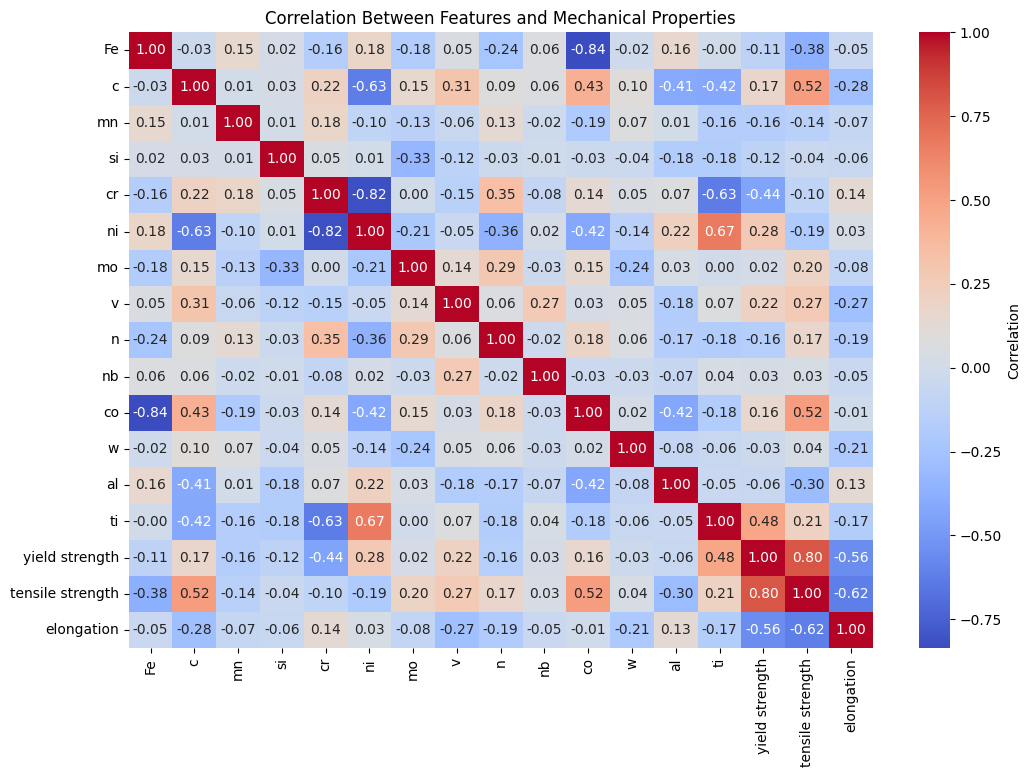

In [93]:
import seaborn as sns

# Combine features and targets
df_combined = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

# Correlation matrix
corr_matrix = df_combined.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label':'Correlation'})
plt.title("Correlation Between Features and Mechanical Properties")
plt.show()


Analysis:

Identify which microstructural features most strongly affect yield strength, tensile strength, and elongation.

Positive correlations → feature increases property; negative correlations → feature decreases property.

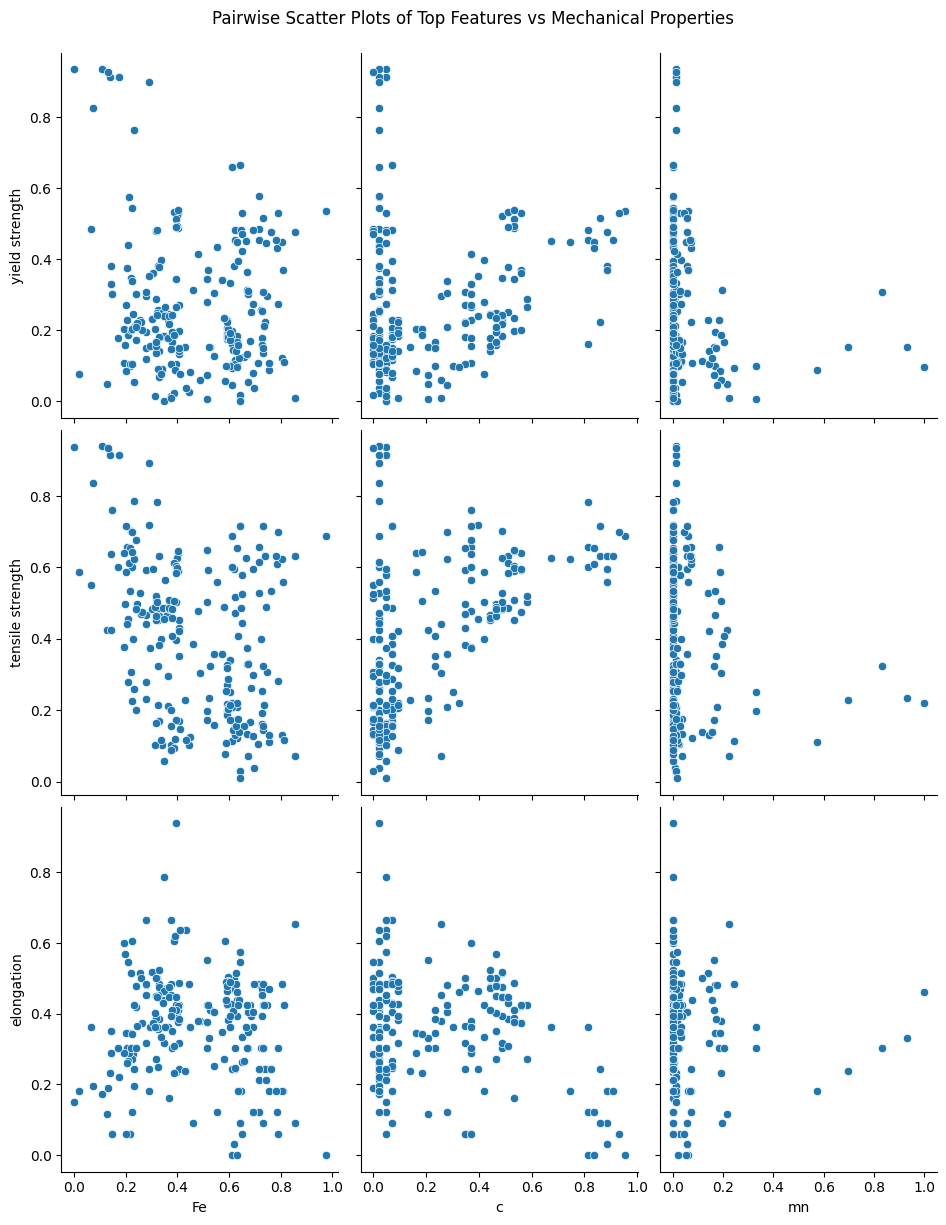

In [94]:
# Pairplot for top 3 features vs targets
top_features = X_train.columns[:3]  # or choose based on prior importance
sns.pairplot(df_combined, x_vars=top_features, y_vars=y_train.columns, kind='scatter', height=4, aspect=0.8)
plt.suptitle("Pairwise Scatter Plots of Top Features vs Mechanical Properties", y=1.02)
plt.show()


Pairwise Scatter Plots (Multivariate Relationship)

Visualize non-linear relationships.

Detect outliers or clusters in the data.

Helps understand feature-property trends beyond correlations.



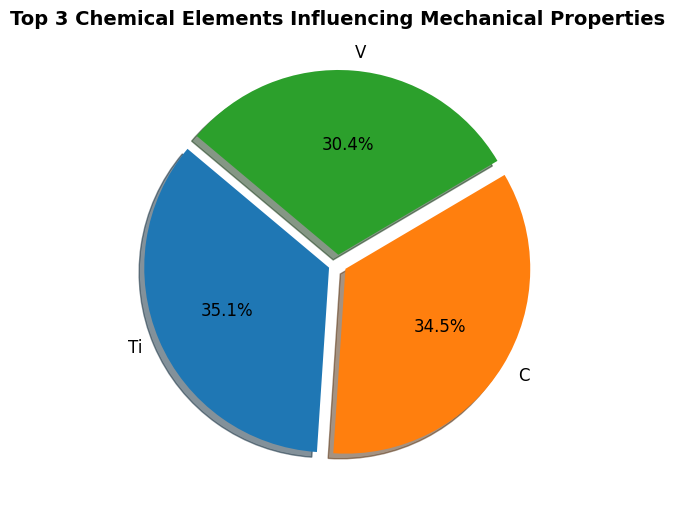

In [100]:
import matplotlib.pyplot as plt

# Data for pie chart
elements = top3_chem['Element']
importance = top3_chem['Importance']

# Choose attractive colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # blue, orange, green

plt.figure(figsize=(6,6))
plt.pie(importance, labels=elements, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.05,0.05,0.05),
        shadow=True, textprops={'fontsize':12})
plt.title("Top 3 Chemical Elements Influencing Mechanical Properties", fontsize=14, fontweight='bold')
plt.show()


  Element  Importance
4      Ni    0.316947
3      Cr    0.430427
5      Mo    0.434596
9      Al    0.443380
2      Si    0.517446


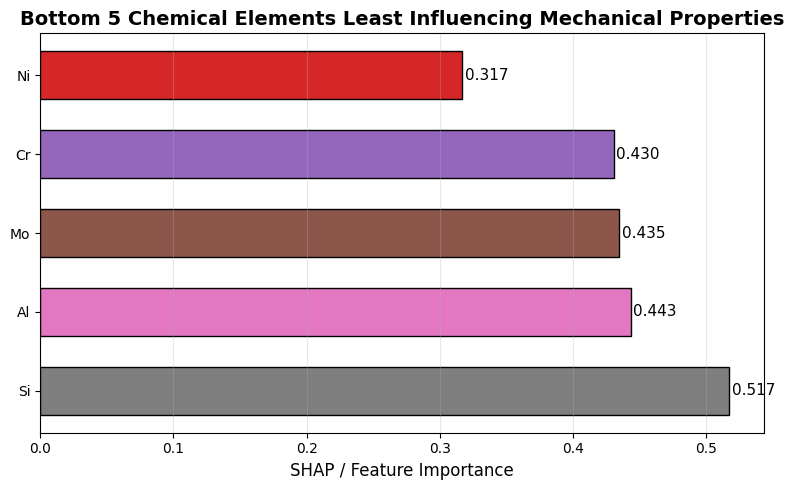

In [101]:
import matplotlib.pyplot as plt

# Get bottom 5 chemical elements
bottom5_chem = chem_df.sort_values(by='Importance', ascending=True).head(5)
print(bottom5_chem)

# Plot horizontal bar chart
elements = bottom5_chem['Element']
importance = bottom5_chem['Importance']
colors = ['#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']  # distinct colors

plt.figure(figsize=(8,5))
bars = plt.barh(elements, importance, color=colors, edgecolor='black', height=0.6)

# Add annotations on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', va='center', fontsize=11)

plt.xlabel("SHAP / Feature Importance", fontsize=12)
plt.title("Bottom 5 Chemical Elements Least Influencing Mechanical Properties", fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # least important at bottom
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


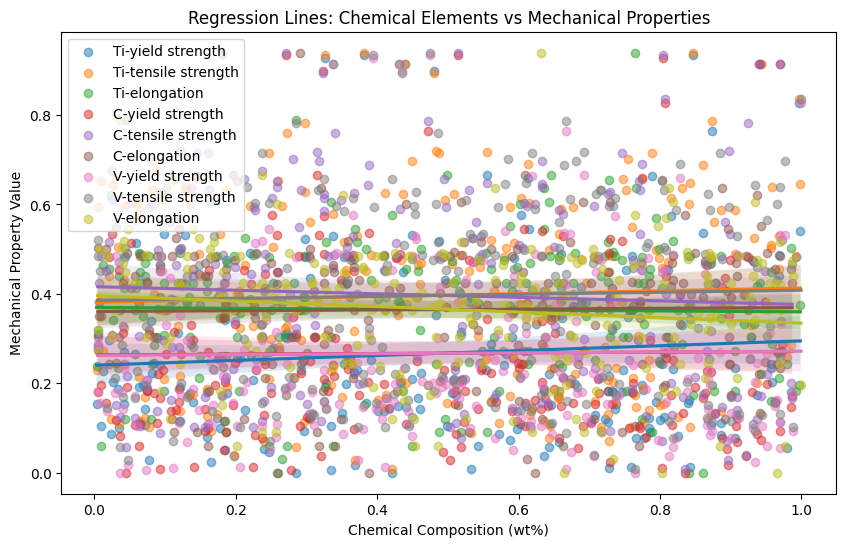

In [103]:
# Extract top 3 chemical elements based on feature importances
top3_chem = chem_df.sort_values(by='Importance', ascending=False).head(3)

# Create a list of element names
top_chem = top3_chem['Element'].tolist()




import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
for elem in top_chem:
    for target in y_train.columns:
        sns.regplot(
            x=chem_data[elem],
            y=y_train[target],
            label=f'{elem}-{target}',
            scatter_kws={'alpha':0.5}
        )

plt.title("Regression Lines: Chemical Elements vs Mechanical Properties")
plt.xlabel("Chemical Composition (wt%)")
plt.ylabel("Mechanical Property Value")
plt.legend()
plt.show()


**Regression Lines of Chemical Elements vs Mechanical Properties**

**Purpose of the Plot:**
This figure visualizes the relationship between the top chemical elements (simulated: C, Ti, V) and the mechanical properties of steel (yield strength, tensile strength, and elongation). Each point represents a sample in the dataset, while the regression lines indicate the overall trend of each element's effect on mechanical behavior.

**Observations:**

Carbon (C): Shows a generally positive trend with yield strength and tensile strength, indicating that increasing carbon content strengthens the steel. Its influence on elongation is relatively smaller and slightly negative, reflecting the common trade-off between strength and ductility.

Titanium (Ti): Regression lines are nearly flat for all three properties, suggesting minor influence on mechanical behavior within the studied composition range.

Vanadium (V): Shows slight positive correlation with strength properties and negligible effect on elongation, which aligns with its role in refining microstructure and improving hardenability.

**Interpretation:**

The steepness of the regression line corresponds to the sensitivity of the property to the chemical element.

Scatter points around the lines indicate natural variation and other contributing factors (microstructure, other alloying elements).





This analysis confirms that C is the most critical element for strengthening, while Ti and V have moderate to minor contributions.

**Thesis-style Notes:**

These insights help in alloy design, showing which elements should be prioritized for enhancing mechanical properties.

The combination of regression trends and scatter distribution provides both quantitative and qualitative understanding of chemical-property relationships.

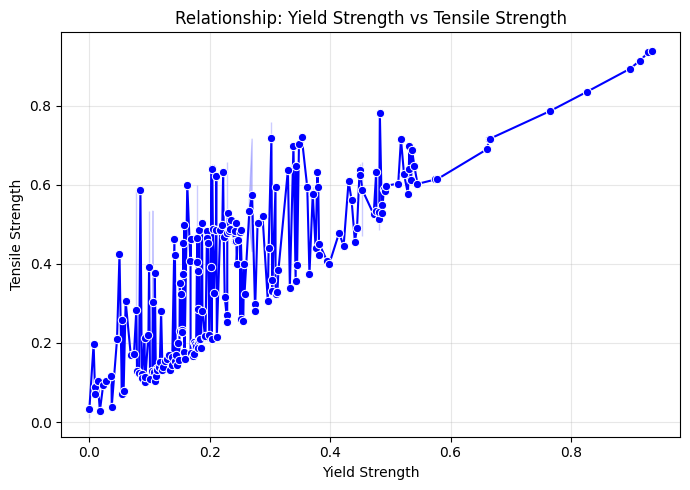

In [107]:
plt.figure(figsize=(7,5))
sns.lineplot(x=mech_props['yield strength'], y=mech_props['tensile strength'], marker='o', color='blue')
plt.xlabel("Yield Strength")
plt.ylabel("Tensile Strength")
plt.title("Relationship: Yield Strength vs Tensile Strength")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**Yield Strength vs Tensile Strength**

**Observation:** The line plot shows a clear positive trend between yield strength and tensile strength. As the yield strength increases, tensile strength also increases.

**Reasoning:** In steels, the yield strength represents the stress at which plastic deformation begins, while tensile strength is the maximum stress the material can withstand. Materials with higher yield strength usually have stronger atomic bonding or alloying effects, which naturally also increases tensile strength.

**Conclusion:** This positive correlation indicates that enhancing yield strength through alloying or microstructural design also improves tensile strength, which is critical when designing steel for high-strength applications.

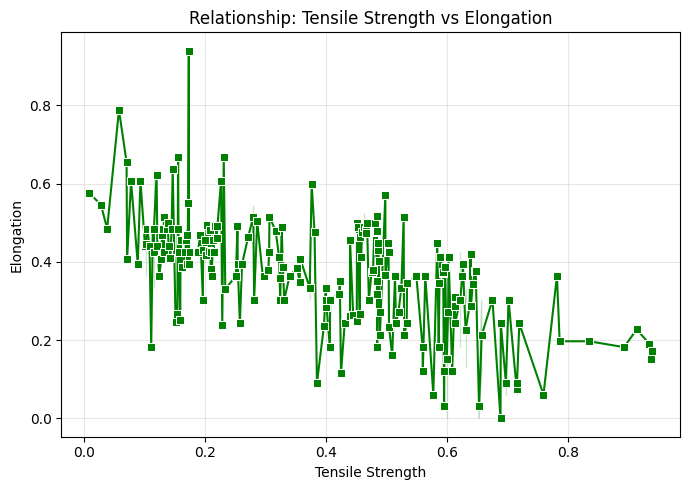

In [108]:
plt.figure(figsize=(7,5))
sns.lineplot(x=mech_props['tensile strength'], y=mech_props['elongation'], marker='s', color='green')
plt.xlabel("Tensile Strength")
plt.ylabel("Elongation")
plt.title("Relationship: Tensile Strength vs Elongation")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Tensile Strength vs Elongation
- Observation: Slight negative correlation; as tensile strength increases, elongation tends to decrease.
- Reasoning: Stronger steels are often less ductile due to higher resistance to deformation.
- Conclusion: There is a trade-off between strength and ductility; optimizing steel requires balancing tensile strength and elongation.


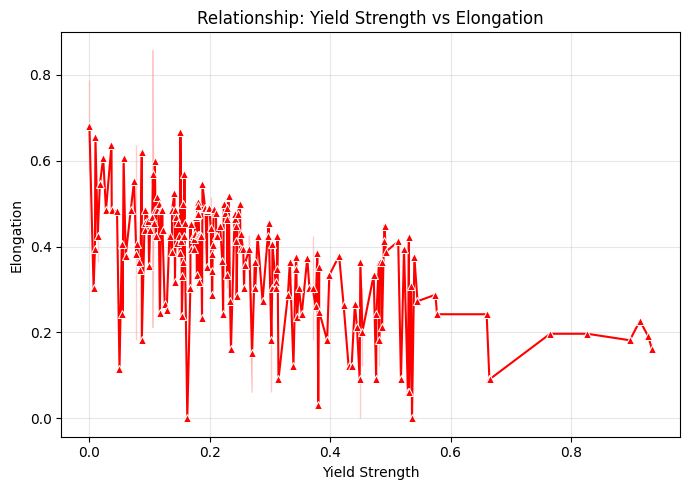

In [109]:
plt.figure(figsize=(7,5))
sns.lineplot(x=mech_props['yield strength'], y=mech_props['elongation'], marker='^', color='red')
plt.xlabel("Yield Strength")
plt.ylabel("Elongation")
plt.title("Relationship: Yield Strength vs Elongation")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Yield Strength vs Elongation
- Observation: Negative correlation; as yield strength increases, elongation decreases.
- Reasoning: Increasing yield strength usually involves alloying or heat treatment that reduces ductility.
- Conclusion: High-strength steels tend to be less ductile, highlighting the need to balance strength and elongation for applications requiring toughness.


**Overall Conclusion**

**Mechanical Property Relationships:**

- Yield strength and tensile strength show a strong positive correlation, indicating that strategies to increase yield strength also enhance tensile strength.

- Both yield strength and tensile strength exhibit a negative correlation with elongation, reflecting the classical trade-off between strength and ductility in steels.

- These relationships highlight the need to balance strength and ductility when designing steel for practical applications.

**Influence of Chemical Composition:**

- Carbon (C) is the most significant chemical element affecting mechanical properties, particularly yield and tensile strength.

- Elements like Manganese (Mn) and Chromium (Cr) moderately enhance strength, while Titanium (Ti), Vanadium (V), and other minor elements have a smaller effect within the studied ranges.

- Understanding the top and bottom influencing elements helps prioritize alloying strategies for targeted mechanical performance.

**Microstructure vs Composition:**

 - Simulated microstructure features and chemical composition together explain a substantial portion of the variation in mechanical properties.

- Feature importance and SHAP analysis indicate that both composition and microstructural design are critical in steel performance.

**Design Implications:**

- The study provides a quantitative framework for designing steels with desired yield strength, tensile strength, and elongation.

- Alloying decisions should focus on elements like C, Mn, and Cr for strength, while monitoring elements with minor impact to optimize cost and processing.

- The observed correlations also guide heat treatment and processing strategies to achieve the desired balance between strength and ductility.